## Project 1

[Task 1] Probability functon of S

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [2]:
#creating numpy arrays with 5 dice:
#Tetrahedron
die4 = np.array([1/4]*4)
#Cube
die6 = np.array([1/6]*6)
#Octahedron
die8 = np.array([1/8]*8)
#Dodecahedron
die12 = np.array([1/12]*12)
#Icosahedron
die20 = np.array([1/20]*20)

In [3]:
#storing tetrahedron probability in a separte array to make the convolution easier
res = die4
#using fro loop to loop through the different element
for i in [die6, die8, die12, die20]:
    res = np.convolve(res, i, mode='full')
    
#checking the shape of the results array    
res.shape

(46,)

In [4]:
#making the table to display the resutls
data = [{'s': s, 'P(S=s)': p} for s, p in enumerate(res, start=5)]
df = pd.DataFrame(data)
print(df)

     s    P(S=s)
0    5  0.000022
1    6  0.000109
2    7  0.000326
3    8  0.000760
4    9  0.001497
5   10  0.002626
6   11  0.004210
7   12  0.006293
8   13  0.008876
9   14  0.011914
10  15  0.015343
11  16  0.019076
12  17  0.023003
13  18  0.026997
14  19  0.030924
15  20  0.034657
16  21  0.038086
17  22  0.041124
18  23  0.043707
19  24  0.045790
20  25  0.047352
21  26  0.048394
22  27  0.048915
23  28  0.048915
24  29  0.048394
25  30  0.047352
26  31  0.045790
27  32  0.043707
28  33  0.041124
29  34  0.038086
30  35  0.034657
31  36  0.030924
32  37  0.026997
33  38  0.023003
34  39  0.019076
35  40  0.015343
36  41  0.011914
37  42  0.008876
38  43  0.006293
39  44  0.004210
40  45  0.002626
41  46  0.001497
42  47  0.000760
43  48  0.000326
44  49  0.000109
45  50  0.000022


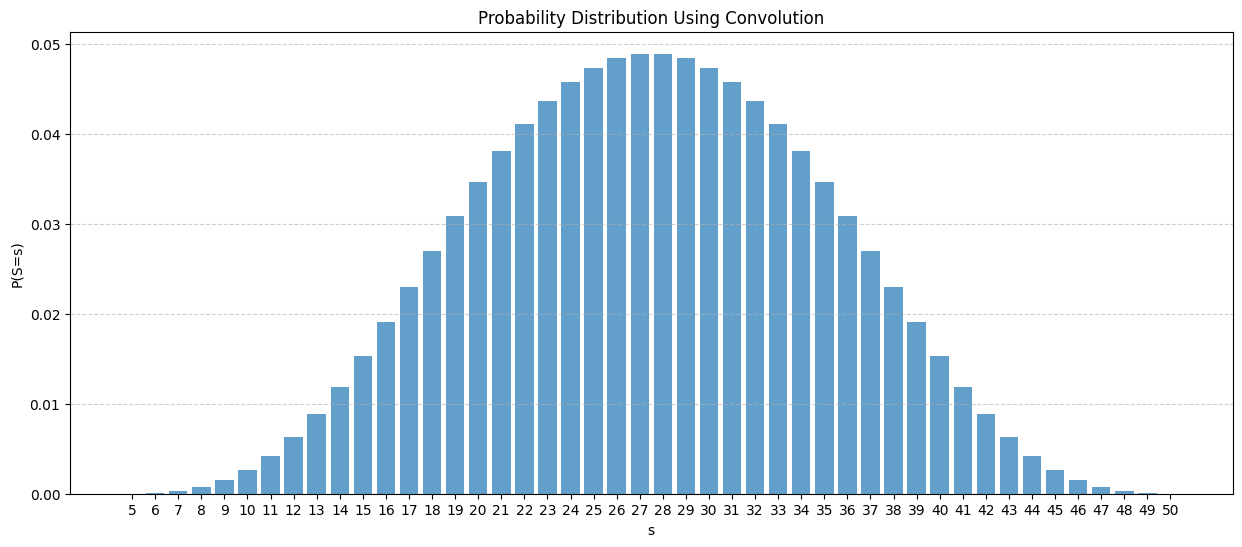

In [5]:
#plotting the graph of the distribution from the values in the table
s_values = list(range(5, len(res) + 5))
probabilities = res
plt.figure(figsize=(15, 6))
plt.bar(s_values, probabilities, width=0.8, align='center', alpha=0.7)
plt.xlabel('s')
plt.ylabel('P(S=s)')
plt.title('Probability Distribution Using Convolution')
plt.xticks(s_values)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

[Task 2] probability for winning the game:



In [6]:
#calcutate the total probability, by using array slices
P10 = df.iloc[:6]['P(S=s)'].sum()
print(f"Sum of probabilities for S ≤ 10: {P10}")
P45 = df.iloc[40:]['P(S=s)'].sum()
print(f"Sum of probabilities for S ≥ 45: {P45}")
Pwin = P10 + P45
print(f"Probability for winning the game using convolution: {Pwin} or {Pwin*100}%")

Sum of probabilities for S ≤ 10: 0.005338541666666667
Sum of probabilities for S ≥ 45: 0.005338541666666665
Probability for winning the game using convolution: 0.010677083333333332 or 1.0677083333333333%


[Task 3] By means of the Monte Carlo simulation, obtain the probability of winning the game with 1000 trials.

In [27]:
#monte-carlo with 1000 trials
NumberOfTrials = 1000

#declaring the two winning conditions
winS10 = 0
winS45 = 0

#for loop to sum up all the random dice outcomes
for trial in range (NumberOfTrials):
    rolls = [random.randint(1, 4), random.randint(1, 6), random.randint(1, 8), random.randint(1, 12), random.randint(1, 20)]
    sumS = sum(rolls)
    
    #summing up to generate the winning chunks
    if sumS <= 10:
        winS10 += 1
    if sumS > 45:
        winS45 += 1
        
#finding the probability of the two winning condidions         
Ps10 = winS10 / NumberOfTrials
Ps45 = winS45 / NumberOfTrials

#the final winning probability using monte-carlo
PMCwin = Ps10 + Ps45
print(f"Probability of winning the game using Monte-Carlo: {PMCwin*100}%")

Probability of winning the game using Monte-Carlo: 1.3%


[Task 4] Discuss how the probability changes when the number of trials changes from a small number (e.g.,10) to a large number (e.g., 100000). Provide a ﬁgure with the discussion.

In [28]:
#creating a monteCarlo function using the same code as above
def monteCarlo(NumberOfTrials):
    #declaring the two winning conditions#declaring the two winning conditions
    winS10 = 0
    winS45 = 0
    
    #for loop to sum up all the random dice outcomes
    for trial in range (NumberOfTrials):
        rolls = [random.randint(1, 4), random.randint(1, 6), random.randint(1, 8), random.randint(1, 12), random.randint(1, 20)]
        sumS = sum(rolls)
        
        #summing up to generate the winning chunks
        if sumS <= 10:
            winS10 += 1
        if sumS > 45:
            winS45 += 1
    #finding the probability of the two winning condidions    
    Ps10 = winS10 / NumberOfTrials
    Ps45 = winS45 / NumberOfTrials

    PMCwin = Ps10 + Ps45
    
    #the final winning probability using monte-carlo
    return PMCwin


In [29]:
numTrials = np.arange(10, 110000, 1000)
#store the resutlts of the simulation    
results = []
for i in numTrials:
    results.append(monteCarlo(i))

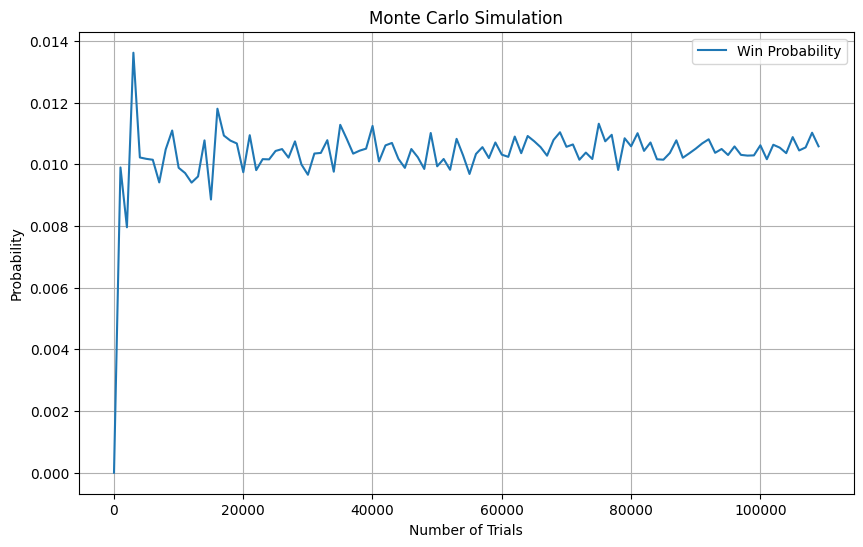

In [30]:
#plotting the simulation results using matplotlib  
plt.figure(figsize=(10, 6))
plt.plot(numTrials, results, label="Win Probability")
plt.xlabel("Number of Trials")
plt.ylabel("Probability")
plt.title("Monte Carlo Simulation")
plt.legend()
plt.grid(True)
plt.show()

[Task 5] How many trials are needed to keep the relative error between the exact value and the simulation result less than 10%? Provide your reasoning.

In [33]:
numTrials1 = np.arange(10, 110000, 1000)
#store the results of the simulaiton 
results1 = []
for i in numTrials1:
    results1.append(((monteCarlo(i) - Pwin )/Pwin)*100)

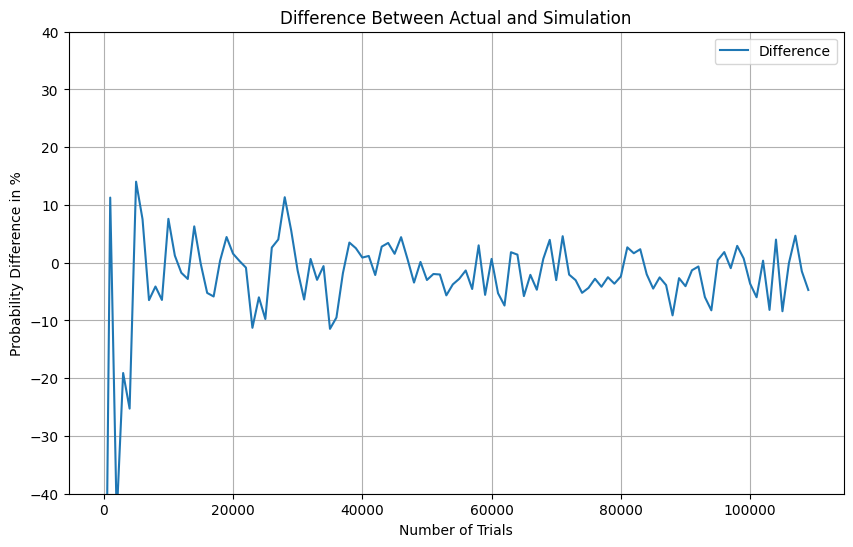

In [32]:
#plotting the differencce using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(numTrials1, results1, label="Difference")
plt.xlabel("Number of Trials")
plt.ylabel("Probability Difference in %")
plt.title("Difference Between Actual and Simulation")
plt.ylim(-40, 40) 
plt.legend()
plt.grid(True)
plt.show()